## Included in this document

1. Import Libraries & Data
2. Extracting Trends 
3. Digging deeper in common trends
4. Frequency analysis 
5. Create Table
6. Extracting Insights 

### 1. Import libraries 

In [ ]:
# Import libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import folium
import json
from collections import Counter

In [2]:
# Import Data 

# Load WW_trends and US_trends data into the the given variables respectively
WW_trends = json.loads(open('/Users/biancaskyehoney/Documents/Twitter - Real-time insights /02. Data /Origional/WWTrends.json').read())
US_trends = json.loads(open('/Users/biancaskyehoney/Documents/Twitter - Real-time insights /02. Data /Origional/USTrends.json').read())

# Inspecting data by printing out WW_trends and US_trends variables
print(WW_trends)
print(US_trends)

[{'trends': [{'name': '#BeratKandili', 'url': 'http://twitter.com/search?q=%23BeratKandili', 'promoted_content': None, 'query': '%23BeratKandili', 'tweet_volume': 46373}, {'name': '#GoodFriday', 'url': 'http://twitter.com/search?q=%23GoodFriday', 'promoted_content': None, 'query': '%23GoodFriday', 'tweet_volume': 81891}, {'name': '#WeLoveTheEarth', 'url': 'http://twitter.com/search?q=%23WeLoveTheEarth', 'promoted_content': None, 'query': '%23WeLoveTheEarth', 'tweet_volume': 159698}, {'name': '#195TLdenTTVerilir', 'url': 'http://twitter.com/search?q=%23195TLdenTTVerilir', 'promoted_content': None, 'query': '%23195TLdenTTVerilir', 'tweet_volume': None}, {'name': '#AFLNorthDons', 'url': 'http://twitter.com/search?q=%23AFLNorthDons', 'promoted_content': None, 'query': '%23AFLNorthDons', 'tweet_volume': None}, {'name': 'Shiv Sena', 'url': 'http://twitter.com/search?q=%22Shiv+Sena%22', 'promoted_content': None, 'query': '%22Shiv+Sena%22', 'tweet_volume': None}, {'name': 'Lyra McKee', 'url': 

#### Lets make the results a bit more manageable to translate 

In [3]:
# Pretty-printing the results. First WW and then US trends.

print("WW trends:")
print (json.dumps(WW_trends, indent=1))

print("\n", "US trends:")
print(json.dumps(US_trends, indent=1))

WW trends:
[
 {
  "trends": [
   {
    "name": "#BeratKandili",
    "url": "http://twitter.com/search?q=%23BeratKandili",
    "promoted_content": null,
    "query": "%23BeratKandili",
    "tweet_volume": 46373
   },
   {
    "name": "#GoodFriday",
    "url": "http://twitter.com/search?q=%23GoodFriday",
    "promoted_content": null,
    "query": "%23GoodFriday",
    "tweet_volume": 81891
   },
   {
    "name": "#WeLoveTheEarth",
    "url": "http://twitter.com/search?q=%23WeLoveTheEarth",
    "promoted_content": null,
    "query": "%23WeLoveTheEarth",
    "tweet_volume": 159698
   },
   {
    "name": "#195TLdenTTVerilir",
    "url": "http://twitter.com/search?q=%23195TLdenTTVerilir",
    "promoted_content": null,
    "query": "%23195TLdenTTVerilir",
    "tweet_volume": null
   },
   {
    "name": "#AFLNorthDons",
    "url": "http://twitter.com/search?q=%23AFLNorthDons",
    "promoted_content": null,
    "query": "%23AFLNorthDons",
    "tweet_volume": null
   },
   {
    "name": "Shiv Sen

### 2. Extracting Trends

#### Now we can see which trends were happening both in the US and worldwide - as well as their tweet volume. 
#### Let's see if we can find a few common trends between both datasets. 

In [4]:
# Extracting all the WW trend names from WW_trends
world_trends = set([trend['name']                    
                    for trend in WW_trends[0]['trends']])

# Extracting all the US trend names from US_trends
us_trends = set([trend['name'] 
                     for trend in US_trends[0]['trends']]) 

# Let's get the intersection of the two sets of trends
common_trends = world_trends.intersection(us_trends)

# Inspecting the data
print(world_trends, "\n")
print(us_trends, "\n")
print (len(common_trends), "common trends:", common_trends)

{'グレア', '#HayırlıCumalar', '池袋の事故', '#BLACKPINKxCorden', '東京・池袋衝突事故', 'Shiv Sena', 'Lil Dicky', '#HayırlıKandiller', '十二国記', 'Derry', '高齢者', '#IndonesianElectionHeroes', '#ConCalmaRemix', '刀ステ', '#TheJudasInMyLife', '#اغلاق_BBM', 'Priyanka Chaturvedi', '#DragRace', '#HardikPatel', '#ViernesSanto', '#WeLoveTheEarth', '#ProtestoEdiyorum', '#NRLBulldogsSouths', '#Jersey', 'プリウス', '#يوم_الجمعه', '브이알', '#DinahJane1', '#Ontas', '#ShivSena', '#GoodFriday', '#19aprile', '#KpuJanganCurang', '#NikahUmurBerapa', '#CHIvLIO', '#Karfreitag', '#DuyguAsena', '#JunquerasACN', 'Berat Kandilimiz', '#AFLNorthDons', 'Lyra McKee', 'Hemant Karkare', 'örgütdeğil arkadaşgrubu', '#195TLdenTTVerilir', '歩行者', '#HanumanJayanti', '免許返納', 'Derrick White', '#BeratKandili', '重体の女性と女児'} 

{'Lone Wolf and Cub', 'Servais', '#WGAMIX', '#BLACKPINKxCorden', 'Lil Dicky', '"Earth"', '#TimeToImpeach', 'Seth Abramson', 'Derry', 'Oshie', '#fridaymotivation', 'Game 6', 'Shy Glizzy', '#ConCalmaRemix', '#CriticalRoleSpoilers', 'Ke

### 3

#### Above we can see 11 common trends 

#### We have found a hot-trend, #WeLoveTheEarth. Now let's see what story it is screaming to tell us!
If we query Twitter's search API with this hashtag as query parameter, we get back actual tweets related to it. We have the response from the search API stored in the datasets folder as 'WeLoveTheEarth.json'. So let's load this dataset and do a deep dive in this trend.

In [5]:
# Loading the data (note this is a pre-exctracted file)

tweets = json.loads(open('/Users/biancaskyehoney/Documents/Twitter - Real-time insights /02. Data /Origional/WeLoveTheEarth.json').read())

In [6]:
# Inspecting some tweets
tweets[0:2]

[{'created_at': 'Fri Apr 19 08:46:48 +0000 2019',
  'id': 1119160405270523904,
  'id_str': '1119160405270523904',
  'text': 'RT @lildickytweets: 🌎 out now #WeLoveTheEarth https://t.co/L22XsoT5P1',
  'truncated': False,
  'entities': {'hashtags': [{'text': 'WeLoveTheEarth', 'indices': [30, 45]}],
   'symbols': [],
   'user_mentions': [{'screen_name': 'lildickytweets',
     'name': 'LD',
     'id': 1209516660,
     'id_str': '1209516660',
     'indices': [3, 18]}],
   'urls': [{'url': 'https://t.co/L22XsoT5P1',
     'expanded_url': 'https://youtu.be/pvuN_WvF1to',
     'display_url': 'youtu.be/pvuN_WvF1to',
     'indices': [46, 69]}]},
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 212

#### that's a lot of information from a single tweet - let's focus on a few interesting fields

In [7]:
# Extracting the text of all the tweets from the tweet object
texts = [tweet['text'] 
                 for tweet in tweets ]

# Extracting screen names of users tweeting about #WeLoveTheEarth
names = [user_mention['screen_name'] 
                 for tweet in tweets
                     for user_mention in tweet['entities']['user_mentions']]

# Extracting all the hashtags being used when talking about this topic
hashtags = [hashtag['text'] 
             for tweet in tweets
                 for hashtag in tweet['entities']['hashtags']]

# Inspecting the first 10 results
print (json.dumps(texts[0:10], indent=1),"\n")
print (json.dumps(names[0:10], indent=1),"\n")
print (json.dumps(hashtags[0:10], indent=1),"\n")

[
 "RT @lildickytweets: \ud83c\udf0e out now #WeLoveTheEarth https://t.co/L22XsoT5P1",
 "\ud83d\udc9a\ud83c\udf0e\ud83d\udc9a  #WeLoveTheEarth \ud83d\udc47\ud83c\udffc",
 "RT @cabeyoomoon: Ta piosenka to bop,  wpada w ucho  i dochody z niej id\u0105 na dobry cel,  warto s\u0142ucha\u0107 w k\u00f3\u0142ko i w k\u00f3\u0142ko gdziekolwiek si\u0119 ty\u2026",
 "#WeLoveTheEarth \nCzemu ja si\u0119 pop\u0142aka\u0142am",
 "RT @Spotify: This is epic. @lildickytweets got @justinbieber, @arianagrande, @halsey, @sanbenito, @edsheeran, @SnoopDogg, @ShawnMendes, @Kr\u2026",
 "RT @biebercentineo: Justin : are we gonna die? \nLil dicky: you know bieber we might die \n\nBTCH IM CRYING #EARTH #WeLoveTheEarth #WELOVEEART\u2026",
 "RT @dreamsiinflate: #WeLoveTheEarth \u201ci am a fat fucking pig\u201d okay brendon urie https://t.co/FdJmq31xZc",
 "Literally no one:\n\nMe in the past 4 hours:\n\nI'm a koala and I sleep all the time, so what, it's cute \ud83c\udfb6\n\n#WeLoveTheEarth #EdSheeranTheKoala",

#### 
We are talking about a song about loving the Earth.

A lot of big artists are the forces behind this Twitter wave, especially Lil Dicky.

Ed Sheeran was some cute koala in the song — "EdSheeranTheKoala" hashtag!

### 5. Frequency analysis 

In [9]:
# Counting occcurrences/ getting frequency dist of all names and hashtags
for item in [names, hashtags]:
    c = Counter(item)
    # Inspecting the 10 most common items in c
    print (c.most_common(10), "\n")

[('lildickytweets', 102), ('LeoDiCaprio', 44), ('ShawnMendes', 33), ('halsey', 31), ('ArianaGrande', 30), ('justinbieber', 29), ('Spotify', 26), ('edsheeran', 26), ('sanbenito', 25), ('SnoopDogg', 25)] 

[('WeLoveTheEarth', 313), ('4future', 12), ('19aprile', 12), ('EARTH', 11), ('fridaysforfuture', 10), ('EarthMusicVideo', 3), ('ConCalmaRemix', 3), ('Earth', 3), ('aliens', 2), ('AvengersEndgame', 2)] 



####
We can more safely say that this was a music video about Earth (hashtag 'EarthMusicVideo') by Lil Dicky.
DiCaprio is not a music artist, but he was involved as well (Leo is an environmentalist so not a surprise to see his name pop up here).
We can also say that the video was released on a Friday; very likely on April 19th.


#### Let's further analyze the data to find patterns in the activity around the tweets — did all retweets occur around a particular tweet?

In [10]:
# Extracting useful information from retweets
retweets = [
             (tweet['retweet_count'], 
              tweet['retweeted_status']['favorite_count'],
              tweet['retweeted_status']['user']['followers_count'],
              tweet['retweeted_status']['user']['screen_name'],
              tweet['text']) 
            
            for tweet in tweets 
                if 'retweeted_status' in tweet
           ]

#### Let's put this in table format 

In [12]:
# Visualizing the data in a pretty and insightful format
df = pd.DataFrame(
    retweets, 
    columns=['Retweets','Favorites','Followers','ScreenName','Text']).groupby(
    ['ScreenName','Text','Followers']).sum().sort_values(by=['Followers'], ascending=False)

df.style.background_gradient()

### 5. Extracting Insights 

(array([303., 107.,  22.,  14.,  36.,  32.,   3.,   2.,   1.,   2.]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

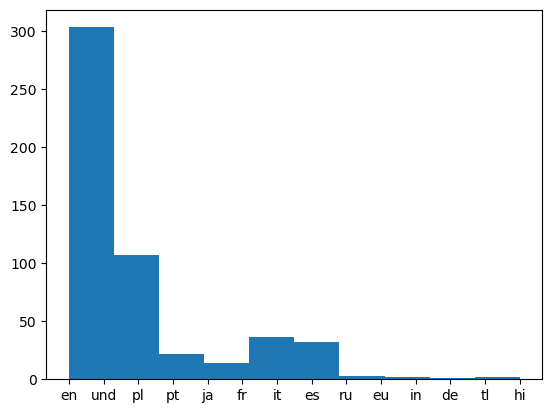

In [13]:
# Extracting language for each tweet and appending it to the list of languages
tweets_languages = []
for tweet in tweets: 
    tweets_languages.append(tweet['lang'])

# Plotting the distribution of languages
%matplotlib inline
plt.hist(tweets_languages)

#### Extracting device types 

In [14]:
# Let's extrct device type for each tweet and appending it to the list of device types
tweets_devices = []
for tweet in tweets:
    device_type = tweet.get('source', 'Unknown')  # If 'source' key is not present, default to 'Unknown'
    tweets_devices.append(device_type)


In [15]:
# Let's extract trend information for each tweet and appending it to the list of trends
tweets_trends = []
for tweet in tweets:
    # Assuming 'hashtags' is the key representing the list of hashtags in each tweet
    hashtags = tweet['entities']['hashtags']
    trend_names = [hashtag['text'] for hashtag in hashtags]
    tweets_trends.append(trend_names)

In [16]:
# Creating a dictionary to store device types and associated trends
device_trend_mapping = {}

# Populating the dictionary with device types and associated trends
for device, trends in zip(tweets_devices, tweets_trends):
    if device not in device_trend_mapping:
        device_trend_mapping[device] = trends
    else:
        device_trend_mapping[device].extend(trends)

In [17]:
# Analyzing the influence of device types on trends
for device, trends in device_trend_mapping.items():
    unique_trends = set(trends)
    print(f"Device Type: {device}")
    print(f"Number of Unique Trends: {len(unique_trends)}")
    print(f"List of Unique Trends: {list(unique_trends)}")
    print("\n")

Device Type: <a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>
Number of Unique Trends: 17
List of Unique Trends: ['EARTH', '19aprile', 'fridaysforfuture', 'Cheetah', 'Entertainment', 'EarthMusicVideo', 'Motivation', 'Earth', 'ConCalmaRemix', '4future', 'subscribe', 'EdSheeranTheKoala', 'FridayFeeling', 'channel', 'WeLoveTheEarth', 'HanumanJayanti', 'YouTube']


Device Type: <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Number of Unique Trends: 12
List of Unique Trends: ['EARTH', '19aprile', 'fridaysforfuture', 'LinkinPark', 'welovetheearth', 'Earth', 'INFOSOS', '4future', 'theresnoplacelikehome', 'WeloveTheEarth', 'AThousandSuns', 'WeLoveTheEarth']


Device Type: <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>
Number of Unique Trends: 3
List of Unique Trends: ['WeLoveTheEarth', 'NewYork', 'GoodFriday']


Device Type: <a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>
Number 

#### Let's try visualize trend popularity by device type`

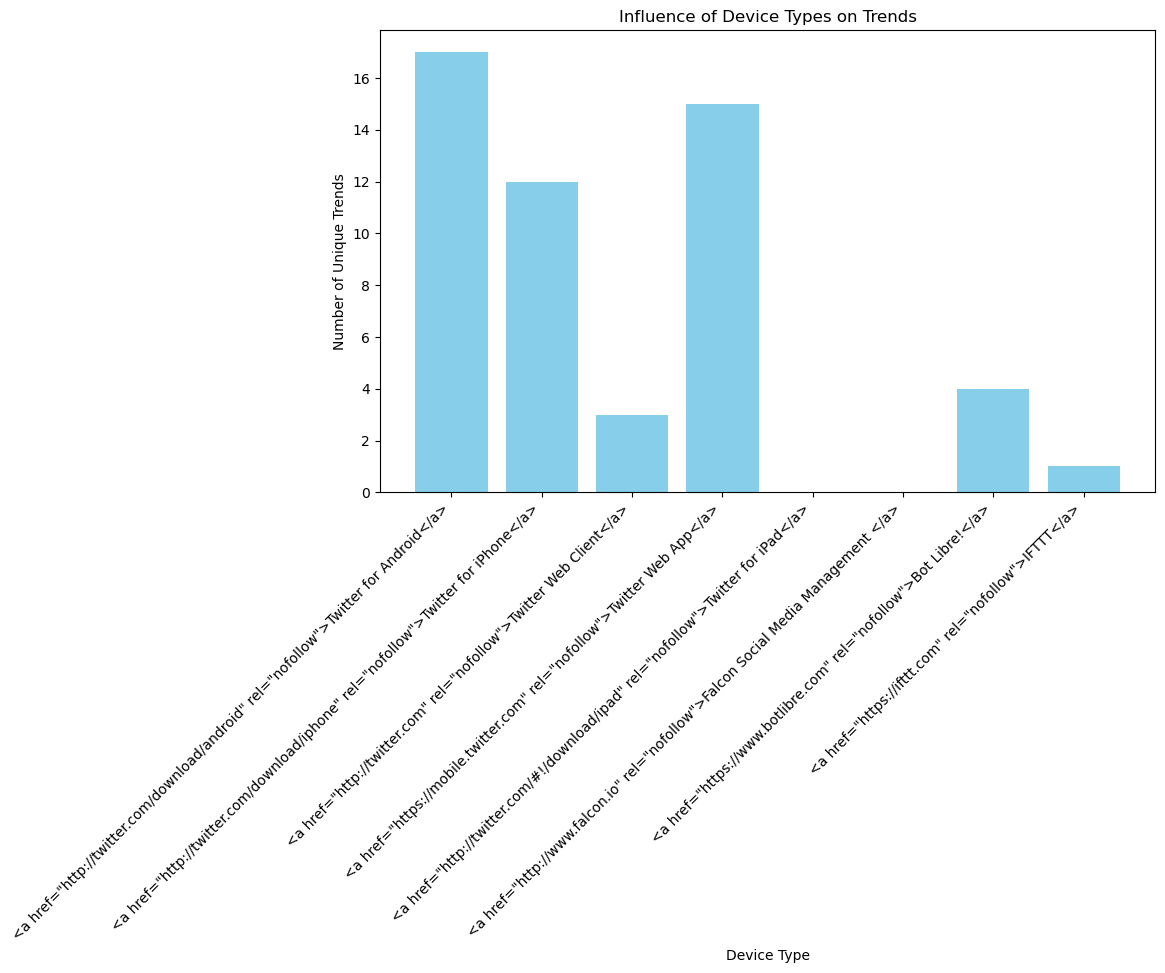

In [19]:
# Extracting data for visualization
device_types = list(device_trend_mapping.keys())
num_unique_trends = [len(set(trends)) for trends in device_trend_mapping.values()]

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(device_types, num_unique_trends, color='skyblue')
plt.xlabel('Device Type')
plt.ylabel('Number of Unique Trends')
plt.title('Influence of Device Types on Trends')
plt.xticks(rotation=45, ha='right')
plt.show()